***Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.***

Some notes:

1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [3]:
len(x_train), len(y_train)

(60000, 60000)

In [4]:
len(x_test), len(y_test)

(10000, 10000)

In [5]:
# Sample Image from Dataset
n = np.random.randint(0, len(x_train))
img = x_train[n]
img.shape

(28, 28)

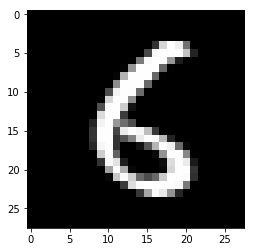

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
# Label for the Sample Image
y_train[n]

6

In [8]:
# Total number of classes
unique_labels = np.unique(y_train)
n_classes = len(unique_labels)
print('Number of Classes: ', n_classes)

Number of Classes:  10


In [9]:
# Normalize Images
x_train = x_train / 255.0
x_test = x_test / 255.0

### Model Definition

In [10]:
# Custom Callback Class
class customCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs['accuracy'] >= 0.99):
            print("\nReached 99% accuracy so cancelling training!\n")
            self.model.stop_training = True

In [11]:
def train_mnist():
    # Instantiate Callback
    callback = customCallback()
    
    # Model Architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=n_classes, activation=tf.nn.softmax),
    ])
    
    # Compile the Model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the Model
    history = model.fit(
        x=x_train, y=y_train, epochs=10,
        validation_data=(x_test, y_test),
        callbacks=[callback],
        workers=4, use_multiprocessing=True
    )
    
    return history.epoch, history.history['accuracy'][-1]

In [12]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1872 - accuracy: 0.9437 - val_loss: 0.1259 - val_accuracy: 0.9621
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0940 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0829 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0807 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9911
Reached 99% accuracy so cancelling training!

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0738 - val_accuracy: 0.9798


([0, 1, 2, 3, 4, 5], 0.9910833239555359)